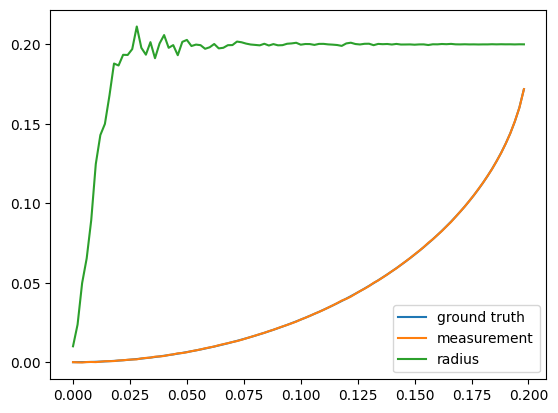

In [118]:
import numpy

import matplotlib.pyplot as plt



class KalmanCircleFit:

    def __init__(self, process_noise, measurement_noise):
        # for constant r variance is small
        self.Q = process_noise
        
        self.R = measurement_noise

        # initial estimated
        self.r_est = 0.01
        self.P_est = 1.0

   

    def step(self, x, y):
        r_pred = self.r_est
        P_pred = self.P_est + self.Q

        tmp = r_pred**2 - x**2
        eps = 10**-6
        if tmp < eps:
            tmp = eps
     
        # Calculate the expected measurement and its Jacobian
        expected_y = r_pred - numpy.sqrt(tmp)
        H = 1 - r_pred / numpy.sqrt(tmp)

        # Innovation (residual) and its covariance
        y_residual = y - expected_y
        S = H * P_pred * H + self.R

        # Kalman gain
        K = P_pred * H / S

        # Update estimate with measurement
        self.r_est = r_pred + K * y_residual
        self.Q = (1 - K * H) * P_pred

        return self.r_est


process_noise     = 1.0
measurement_noise = 10**-4

kf = KalmanCircleFit(process_noise, measurement_noise)


n_points = 100

r = 0.2


points_x  = []
points_y  = []
points_ym = []
radius    = []

for n in range(n_points):
    x  = r*n/n_points
    y  = r - numpy.sqrt(r**2 - x**2)
    ym = y + measurement_noise*numpy.random.randn()

    r_est = kf.step(x, ym)

    #print(r_est)

    points_x.append(x)
    points_y.append(y)
    points_ym.append(ym)
    radius.append(r_est)

    #print(r_est)


plt.plot(points_x, points_y, label="ground truth")
plt.plot(points_x, points_ym, label="measurement")

plt.plot(points_x, radius, label="radius")

plt.legend()
plt.show()